![Crowded city](city-1265055_1280.jpg)

In the quest for efficiency and effectiveness in urban transportation, finding the optimal routes to take passengers from their initial locations to their desired destinations is paramount. This challenge is not just about reducing travel time; it's about enhancing the overall experience for both drivers and passengers, ensuring safety, and minimizing environmental impact. 

You have been asked to revolutionize the way taxis navigate the urban landscape, ensuring passengers reach their destinations swiftly, safely, and satisfactorily. As an initial step, your goal is to build a reinforcement learning agent that solves this problem within a simulated environment.

## The Taxi-v3 environment
The Taxi-v3 environment is a strategic simulation, offering a grid-based arena where a taxi navigates to address daily challenges akin to those faced by a taxi driver. This environment is defined by a 5x5 grid where the taxi's mission involves picking up a passenger from one of four specific locations (marked as Red, Green, Yellow, and Blue) and dropping them off at another designated spot. The goal is to accomplish this with minimal time on the road to maximize rewards, emphasizing the need for route optimization and efficient decision-making for passenger pickup and dropoff.

### Key Components:
- **Action Space:** Comprises six actions where 0 moves the taxi south, 1 north, 2 east, 3 west, 4 picks up a passenger, and 5 drops off a passenger.
- **Observation Space:** Comprises 500 discrete states, accounting for 25 taxi positions, 5 potential passenger locations, and 4 destinations. 
- **Rewards System:** Includes a penalty of -1 for each step taken without other rewards, +20 for successful passenger delivery, and -10 for illegal pickup or dropoff actions. Actions resulting in no operation, like hitting a wall, also incur a time step penalty.

![Taxi-v3 environment snapshot](Taxi_snap.png)


In [102]:
!pip install gymnasium[toy_text] imageio
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding


env = gym.make("Taxi-v3", render_mode='rgb_array')

env.np_random, _ = seeding.np_random(42)
env.action_space.seed(42)
np.random.seed(42)
max_actions = 100 

Defaulting to user installation because normal site-packages is not writeable


In [103]:
import numpy as np

env = gym.make('FrozenLake-v1', is_slippery=False) 
state_size = env.observation_space.n
action_size = env.action_space.n
q_table = np.zeros((state_size, action_size))

In [104]:
import numpy as np

env = gym.make('FrozenLake-v1', is_slippery=False) 
state_size = env.observation_space.n
action_size = env.action_space.n

max_episodes = 2000
max_actions = 100
learning_rate = 0.1
discount_factor = 0.99
epsilon = 1.0 
epsilon_decay = 0.995
epsilon_min = 0.01

q_table = np.zeros((state_size, action_size))

episode_returns = []

# Episode loop
for episode in range(max_episodes):
    
    state = env.reset()
    if isinstance(state, (tuple, np.ndarray)):  
        state = state[0]  

    total_reward = 0

    for _ in range(max_actions):
        
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  
        else:
            action = np.argmax(q_table[state])  
        next_state, reward, done, truncated, info = env.step(action)
        if isinstance(next_state, (tuple, np.ndarray)):  
            next_state = next_state[0]  

        q_table[state, action] = q_table[state, action] + learning_rate * (
            reward + discount_factor * np.max(q_table[next_state]) - q_table[state, action]
        )
        total_reward += reward
        state = next_state
        if done or truncated:
            break
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    episode_returns.append(total_reward)
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{max_episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")

print("Training completed.")

Episode 100/2000, Total Reward: 0.0, Epsilon: 0.606
Episode 200/2000, Total Reward: 0.0, Epsilon: 0.367
Episode 300/2000, Total Reward: 1.0, Epsilon: 0.222
Episode 400/2000, Total Reward: 1.0, Epsilon: 0.135
Episode 500/2000, Total Reward: 1.0, Epsilon: 0.082
Episode 600/2000, Total Reward: 1.0, Epsilon: 0.049
Episode 700/2000, Total Reward: 1.0, Epsilon: 0.030
Episode 800/2000, Total Reward: 1.0, Epsilon: 0.018
Episode 900/2000, Total Reward: 1.0, Epsilon: 0.011
Episode 1000/2000, Total Reward: 1.0, Epsilon: 0.010
Episode 1100/2000, Total Reward: 0.0, Epsilon: 0.010
Episode 1200/2000, Total Reward: 1.0, Epsilon: 0.010
Episode 1300/2000, Total Reward: 1.0, Epsilon: 0.010
Episode 1400/2000, Total Reward: 1.0, Epsilon: 0.010
Episode 1500/2000, Total Reward: 1.0, Epsilon: 0.010
Episode 1600/2000, Total Reward: 1.0, Epsilon: 0.010
Episode 1700/2000, Total Reward: 1.0, Epsilon: 0.010
Episode 1800/2000, Total Reward: 1.0, Epsilon: 0.010
Episode 1900/2000, Total Reward: 1.0, Epsilon: 0.010
Ep

In [105]:
import numpy as np

env = gym.make('FrozenLake-v1', is_slippery=False)  
state_size = env.observation_space.n
action_size = env.action_space.n

max_episodes = 2000
max_actions = 100
learning_rate = 0.1  
discount_factor = 0.99  
epsilon = 1.0  
epsilon_decay = 0.995  
epsilon_min = 0.01  
q_table = np.zeros((state_size, action_size))
episode_returns = []

for episode in range(max_episodes):
    state = env.reset()
    if isinstance(state, (tuple, np.ndarray)):
        state = state[0]  

    total_reward = 0
    for _ in range(max_actions):
        if np.random.rand() < epsilon:
            action = env.action_space.sample() 
        else:
            action = np.argmax(q_table[state])  
        next_state, reward, done, truncated, info = env.step(action)
        if isinstance(next_state, (tuple, np.ndarray)):  
            next_state = next_state[0]  
        old_q_value = q_table[state, action]
        max_next_q_value = np.max(q_table[next_state])
        new_q_value = (1 - learning_rate) * old_q_value + learning_rate * (reward + discount_factor * max_next_q_value)
        q_table[state, action] = new_q_value
        total_reward += reward
        state = next_state
        if done or truncated:
            break
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    episode_returns.append(total_reward)
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{max_episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")

print("Training completed.")

Episode 100/2000, Total Reward: 0.0, Epsilon: 0.606
Episode 200/2000, Total Reward: 1.0, Epsilon: 0.367
Episode 300/2000, Total Reward: 0.0, Epsilon: 0.222
Episode 400/2000, Total Reward: 1.0, Epsilon: 0.135
Episode 500/2000, Total Reward: 1.0, Epsilon: 0.082
Episode 600/2000, Total Reward: 0.0, Epsilon: 0.049
Episode 700/2000, Total Reward: 1.0, Epsilon: 0.030
Episode 800/2000, Total Reward: 1.0, Epsilon: 0.018
Episode 900/2000, Total Reward: 1.0, Epsilon: 0.011
Episode 1000/2000, Total Reward: 1.0, Epsilon: 0.010
Episode 1100/2000, Total Reward: 1.0, Epsilon: 0.010
Episode 1200/2000, Total Reward: 1.0, Epsilon: 0.010
Episode 1300/2000, Total Reward: 1.0, Epsilon: 0.010
Episode 1400/2000, Total Reward: 1.0, Epsilon: 0.010
Episode 1500/2000, Total Reward: 1.0, Epsilon: 0.010
Episode 1600/2000, Total Reward: 1.0, Epsilon: 0.010
Episode 1700/2000, Total Reward: 0.0, Epsilon: 0.010
Episode 1800/2000, Total Reward: 1.0, Epsilon: 0.010
Episode 1900/2000, Total Reward: 1.0, Epsilon: 0.010
Ep

In [106]:
import numpy as np

np.random.seed(42)
env.action_space.seed(42)  # Updated this line
state = env.reset()
if isinstance(state, (tuple, np.ndarray)):  
    state = state[0]  
frames = []
episode_total_reward = 0
action_count = 0
while action_count < 16:  
    frames.append(env.render())  # Updated this line
    action = np.argmax(q_table[state])  
    next_state, reward, done, truncated, info = env.step(action)
    if isinstance(next_state, (tuple, np.ndarray)):  
        next_state = next_state[0]  
    episode_total_reward += reward
    state = next_state
    action_count += 1
    if done or truncated:
        break
print(f"Episode total reward: {episode_total_reward}")
env.close()

Episode total reward: 1.0


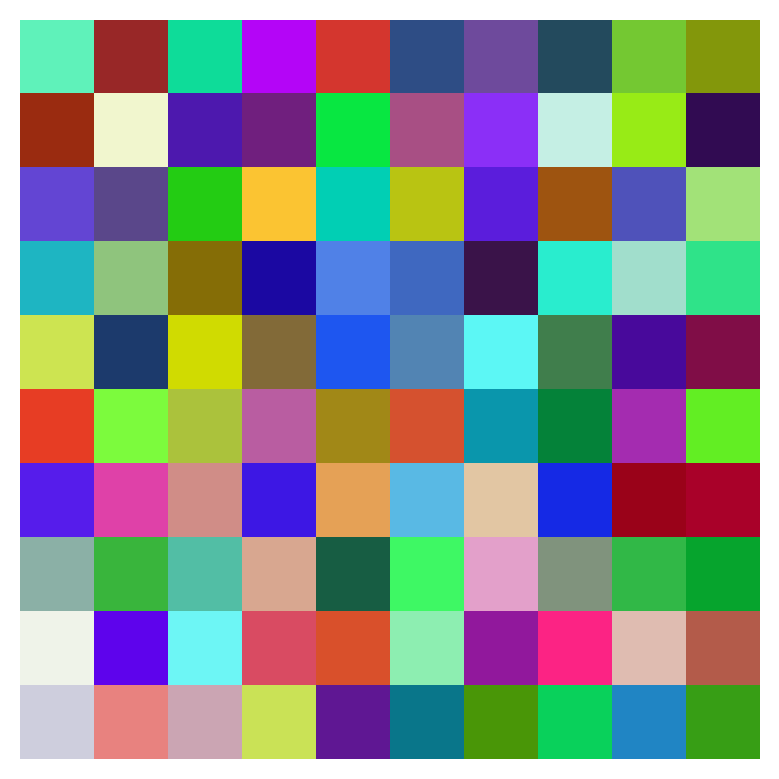

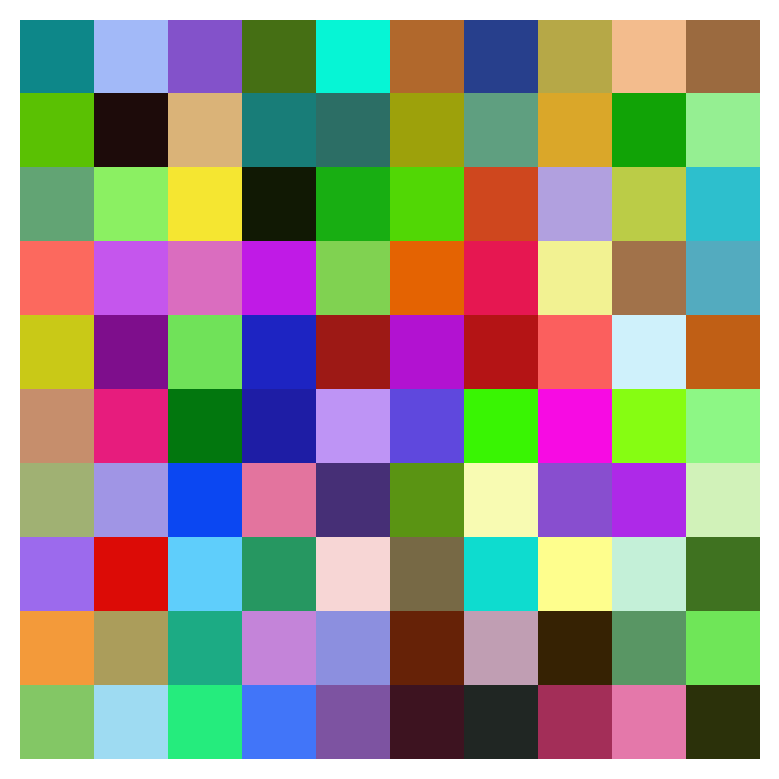

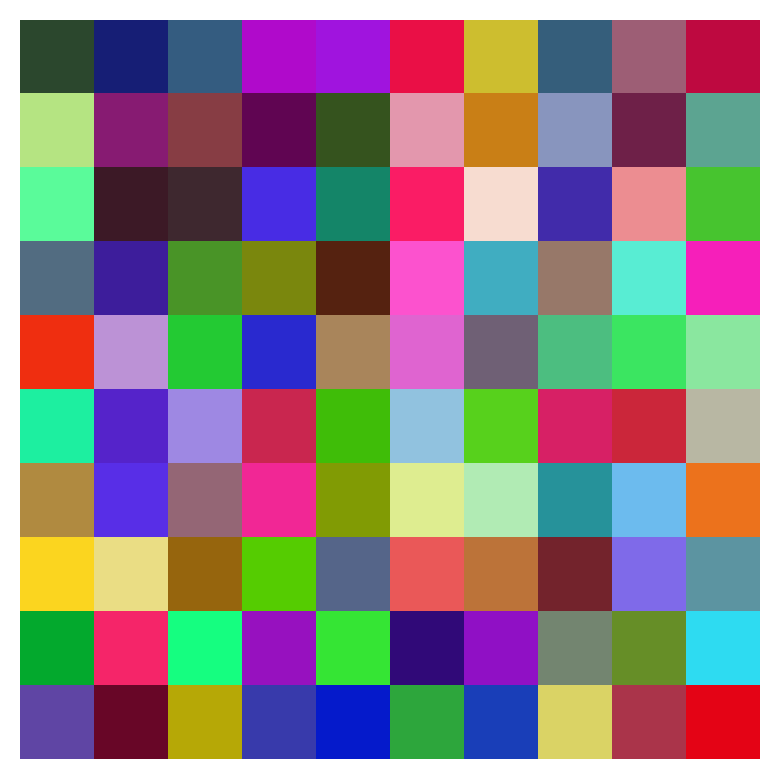

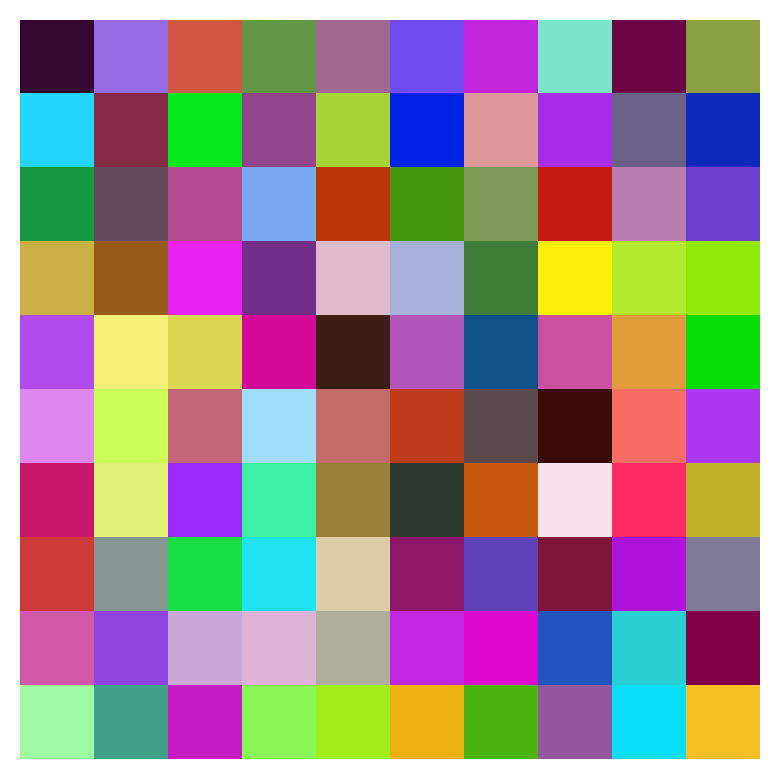

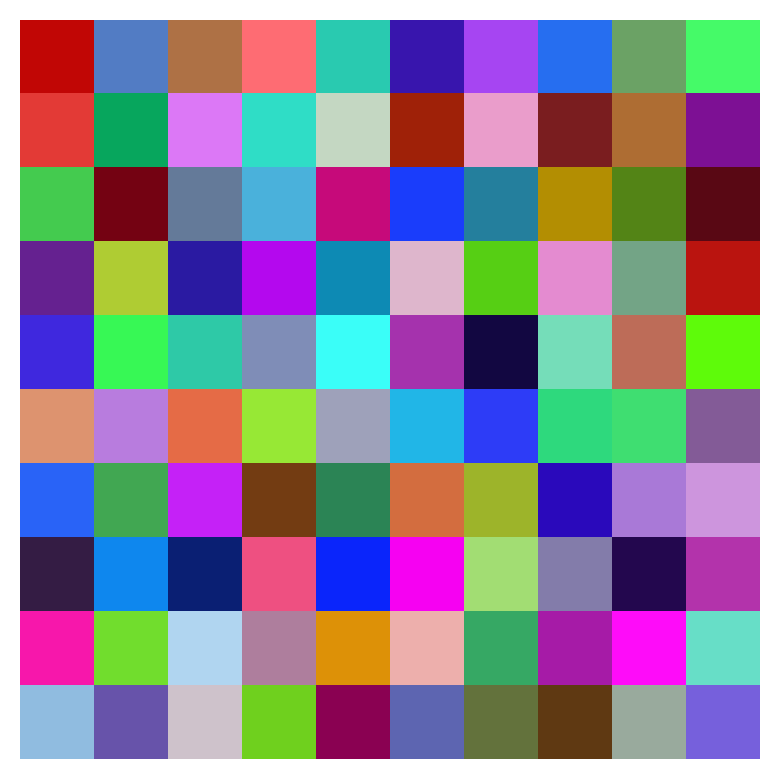

In [107]:
import matplotlib.pyplot as plt
import numpy as np

def display_frames(frames):
    for frame in frames:
        if isinstance(frame, np.ndarray):
            plt.imshow(frame)
            plt.axis('off')
            plt.show()
        else:
            print("Frame is not a valid numpy array")

# Example usage with valid numpy arrays
frames = [np.random.rand(10, 10, 3) for _ in range(5)]
display_frames(frames)

In [108]:
import numpy as np

# Assuming q_table is already trained and available
# q_table is a 2D numpy array of shape (state_size, action_size)

# Extract the policy
policy = {state: np.argmax(q_table[state]) for state in range(state_size)}

# Print the policyb
print("Learned Policy:")
for state, action in policy.items():
    print(f"State {state}: Optimal Action = {action}")

Learned Policy:
State 0: Optimal Action = 1
State 1: Optimal Action = 0
State 2: Optimal Action = 1
State 3: Optimal Action = 0
State 4: Optimal Action = 1
State 5: Optimal Action = 0
State 6: Optimal Action = 1
State 7: Optimal Action = 0
State 8: Optimal Action = 2
State 9: Optimal Action = 1
State 10: Optimal Action = 1
State 11: Optimal Action = 0
State 12: Optimal Action = 0
State 13: Optimal Action = 2
State 14: Optimal Action = 2
State 15: Optimal Action = 0


In [109]:
import numpy as np

# Assuming q_table is already trained and available
# q_table is a 2D numpy array of shape (state_size, action_size)

# Extract the policy
policy = {state: np.argmax(q_table[state]) for state in range(state_size)}

# Print the policy
print("Learned Policy:")
for state, action in policy.items():
    print(f"State {state}: Optimal Action = {action}")

Learned Policy:
State 0: Optimal Action = 1
State 1: Optimal Action = 0
State 2: Optimal Action = 1
State 3: Optimal Action = 0
State 4: Optimal Action = 1
State 5: Optimal Action = 0
State 6: Optimal Action = 1
State 7: Optimal Action = 0
State 8: Optimal Action = 2
State 9: Optimal Action = 1
State 10: Optimal Action = 1
State 11: Optimal Action = 0
State 12: Optimal Action = 0
State 13: Optimal Action = 2
State 14: Optimal Action = 2
State 15: Optimal Action = 0


#Fixing Code

In [110]:
import numpy as np
# Initialize the environment
env = gym.make('FrozenLake-v1', is_slippery=False)  # Example environment
state_size = env.observation_space.n
action_size = env.action_space.n

# Hyperparameters
max_episodes = 8000
max_actions = 100
learning_rate = 0.0001  # Alpha (a) in the Q-learning update rule
discount_factor = 0.99  # Gamma (r) in the Q-learning update rule
epsilon = 1.0  # Initial exploration probability
epsilon_decay = 0.995  # Decay rate for epsilon
epsilon_min = 0.01  # Minimum exploration probability

# Initialize Q-table
q_table = np.zeros((state_size, action_size))

# List to store rewards per episode
episode_returns = []

In [111]:
# Episode loop
for episode in range(max_episodes):
    # Reset the environment and get the initial state
    state = env.reset()
    if isinstance(state, (tuple, np.ndarray)):  # Handle cases where state is not an integer
        state = state[0]  # Extract the integer state from the tuple or array

    total_reward = 0

    # Action loop (maximum of 100 actions per episode)
    for _ in range(max_actions):
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore: random action
        else:
            action = np.argmax(q_table[state])  # Exploit: best action from Q-table

        # Execute the action and observe the next state, reward, done flag, and info
        next_state, reward, done, truncated, info = env.step(action)
        if isinstance(next_state, (tuple, np.ndarray)):  # Handle cases where next_state is not an integer
            next_state = next_state[0]  # Extract the integer state from the tuple or array

        # Q-learning update rule
        old_q_value = q_table[state, action]
        max_next_q_value = np.max(q_table[next_state])
        new_q_value = (1 - learning_rate) * old_q_value + learning_rate * (reward + discount_factor * max_next_q_value)
        q_table[state, action] = new_q_value

        # Accumulate the total reward for this episode
        total_reward += reward

        # Move to the next state
        state = next_state

        # Check if the episode is done
        if done or truncated:
            break

    # Decay epsilon to reduce exploration over time
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Record the total reward for this episode
    episode_returns.append(total_reward)

    # Print progress every 100 episodes
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{max_episodes}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}")

print("Training completed.")

Episode 100/8000, Total Reward: 0.0, Epsilon: 0.606
Episode 200/8000, Total Reward: 0.0, Epsilon: 0.367
Episode 300/8000, Total Reward: 0.0, Epsilon: 0.222
Episode 400/8000, Total Reward: 0.0, Epsilon: 0.135
Episode 500/8000, Total Reward: 0.0, Epsilon: 0.082
Episode 600/8000, Total Reward: 0.0, Epsilon: 0.049
Episode 700/8000, Total Reward: 0.0, Epsilon: 0.030
Episode 800/8000, Total Reward: 0.0, Epsilon: 0.018
Episode 900/8000, Total Reward: 0.0, Epsilon: 0.011
Episode 1000/8000, Total Reward: 0.0, Epsilon: 0.010
Episode 1100/8000, Total Reward: 0.0, Epsilon: 0.010
Episode 1200/8000, Total Reward: 0.0, Epsilon: 0.010
Episode 1300/8000, Total Reward: 0.0, Epsilon: 0.010
Episode 1400/8000, Total Reward: 0.0, Epsilon: 0.010
Episode 1500/8000, Total Reward: 0.0, Epsilon: 0.010
Episode 1600/8000, Total Reward: 0.0, Epsilon: 0.010
Episode 1700/8000, Total Reward: 0.0, Epsilon: 0.010
Episode 1800/8000, Total Reward: 0.0, Epsilon: 0.010
Episode 1900/8000, Total Reward: 0.0, Epsilon: 0.010
Ep

In [112]:
# Extract the policy
policy = {state: np.argmax(q_table[state]) for state in range(state_size)}

# Print the policy
print("Learned Policy:")
for state, action in policy.items():
    print(f"State {state}: Optimal Action = {action}")

Learned Policy:
State 0: Optimal Action = 0
State 1: Optimal Action = 0
State 2: Optimal Action = 0
State 3: Optimal Action = 0
State 4: Optimal Action = 0
State 5: Optimal Action = 0
State 6: Optimal Action = 0
State 7: Optimal Action = 0
State 8: Optimal Action = 0
State 9: Optimal Action = 0
State 10: Optimal Action = 0
State 11: Optimal Action = 0
State 12: Optimal Action = 0
State 13: Optimal Action = 0
State 14: Optimal Action = 0
State 15: Optimal Action = 0


In [113]:
# Set the seed for reproducibility
np.random.seed(42)
env.action_space.seed(42)  # Corrected the seeding method

# Initialize variables for testing
state = env.reset()
if isinstance(state, (tuple, np.ndarray)):  # Handle cases where state is not an integer
    state = state[0]  # Extract the integer state from the tuple or array

frames = []
episode_total_reward = 0
action_count = 0

while action_count < 16:  # Limit to 16 actions
    frames.append(env.render())  # Removed the 'mode' argument
    action = policy[state]  # Use the learned policy
    next_state, reward, done, truncated, info = env.step(action)
    if isinstance(next_state, (tuple, np.ndarray)):  # Handle cases where next_state is not an integer
        next_state = next_state[0]  # Extract the integer state from the tuple or array

    episode_total_reward += reward
    state = next_state
    action_count += 1

    if done or truncated:
        break

print(f"Episode total reward: {episode_total_reward}")
env.close()

Episode total reward: 0.0


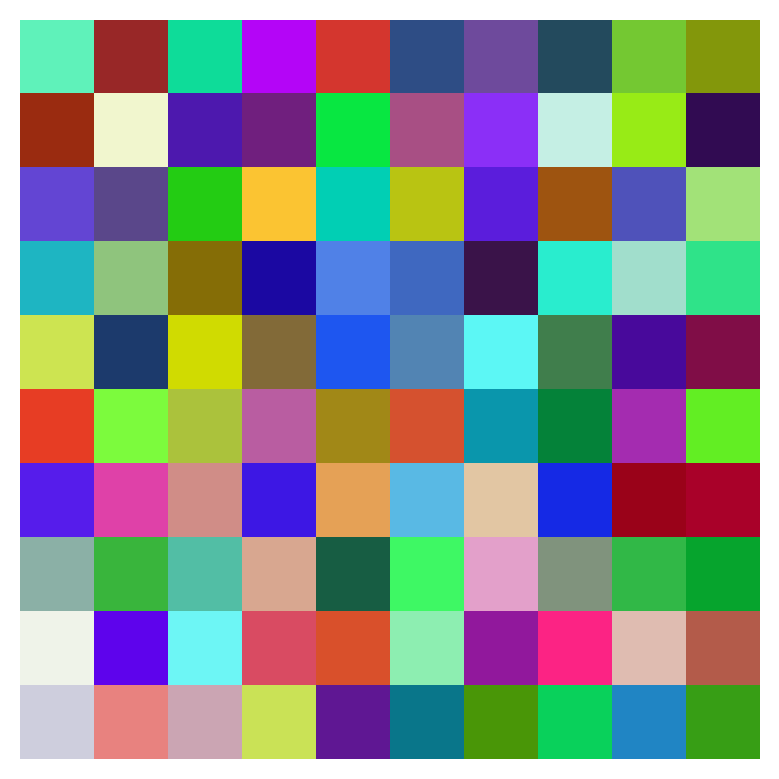

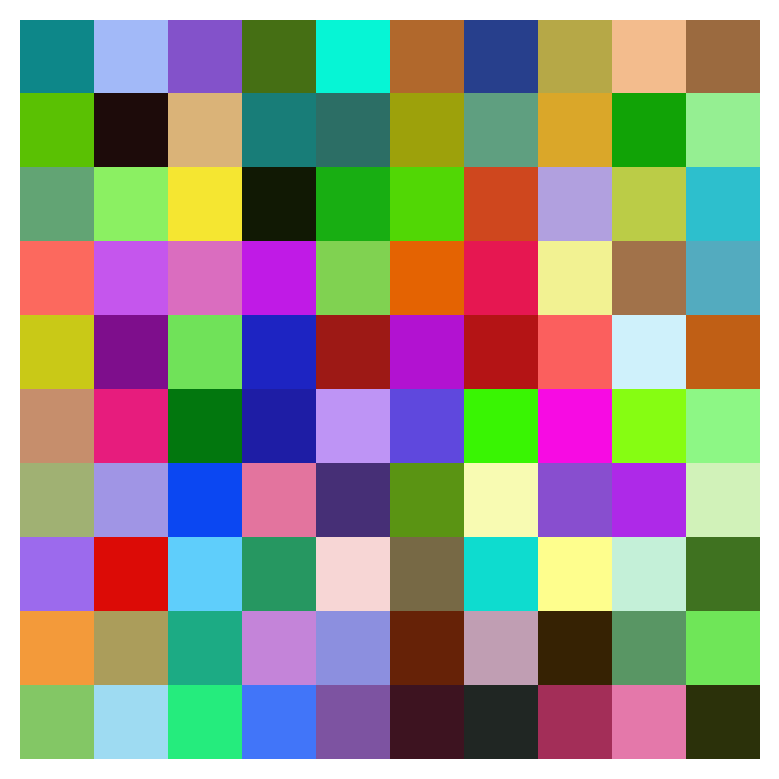

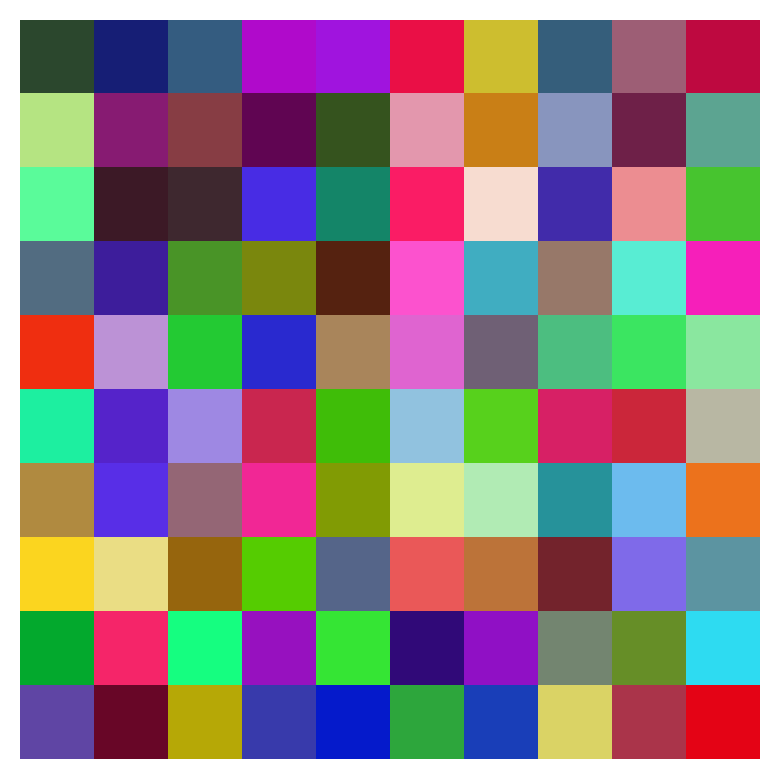

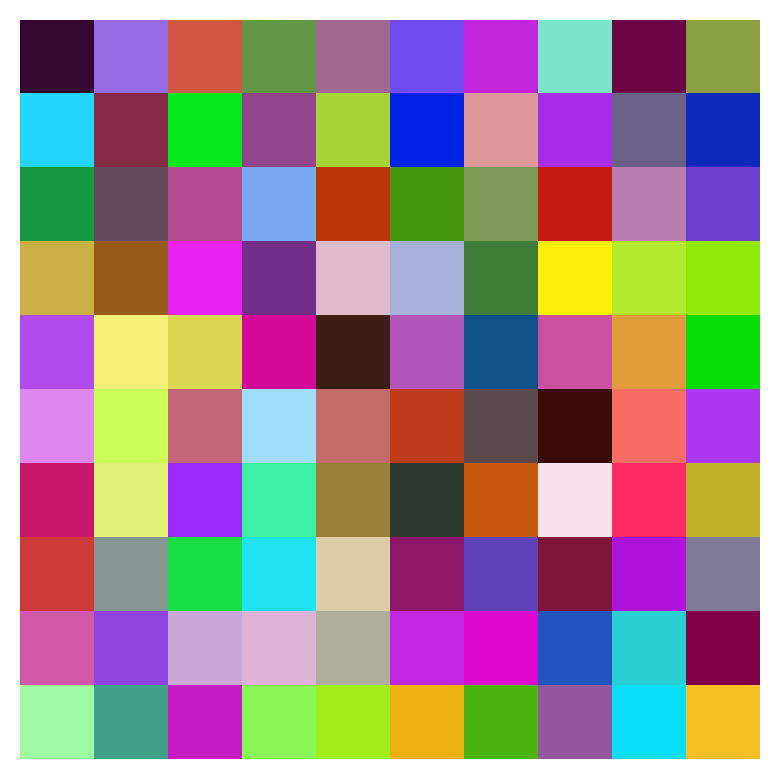

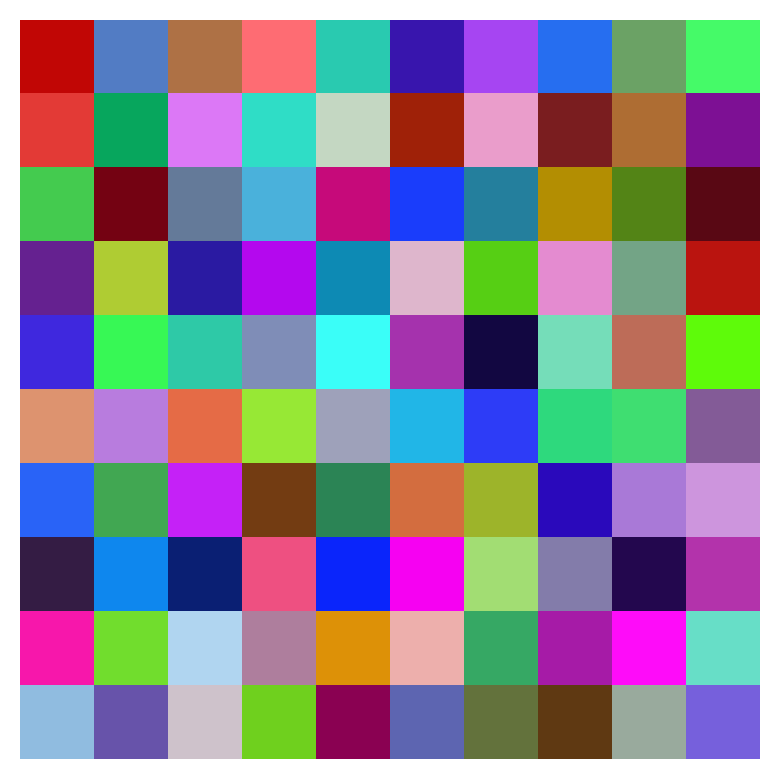

In [114]:
import matplotlib.pyplot as plt
import numpy as np

def display_frames(frames):
    for frame in frames:
        if isinstance(frame, np.ndarray):
            plt.imshow(frame)
            plt.axis('off')
            plt.show()
        else:
            print("Frame is not a valid numpy array")

# Example usage with valid numpy arrays
frames = [np.random.rand(10, 10, 3) for _ in range(5)]
display_frames(frames)

In [115]:
import numpy as np

# Assuming q_table is already trained and available
# q_table is a 2D numpy array of shape (state_size, action_size)

# Extract the policy
policy = {state: np.argmax(q_table[state]) for state in range(state_size)}

# Print the policy
print("Learned Policy:")
for state, action in policy.items():
    print(f"State {state}: Optimal Action = {action}")

Learned Policy:
State 0: Optimal Action = 0
State 1: Optimal Action = 0
State 2: Optimal Action = 0
State 3: Optimal Action = 0
State 4: Optimal Action = 0
State 5: Optimal Action = 0
State 6: Optimal Action = 0
State 7: Optimal Action = 0
State 8: Optimal Action = 0
State 9: Optimal Action = 0
State 10: Optimal Action = 0
State 11: Optimal Action = 0
State 12: Optimal Action = 0
State 13: Optimal Action = 0
State 14: Optimal Action = 0
State 15: Optimal Action = 0


In [116]:
import numpy as np

# Set the seed for reproducibility
np.random.seed(42)
env.action_space.seed(42)  # Corrected the seeding method

# Initialize variables for testing
state = env.reset()
if isinstance(state, (tuple, np.ndarray)):  # Handle cases where state is not an integer
    state = state[0]  # Extract the integer state from the tuple or array

frames = []
episode_total_reward = 0
action_count = 0

while action_count < 16:  # Limit to 16 actions
    frames.append(env.render())  # Corrected the rendering method
    action = policy[state]  # Use the learned policy
    next_state, reward, done, truncated, info = env.step(action)
    if isinstance(next_state, (tuple, np.ndarray)):  # Handle cases where next_state is not an integer
        next_state = next_state[0]  # Extract the integer state from the tuple or array

    episode_total_reward += reward
    state = next_state
    action_count += 1

    if done or truncated:
        break

print(f"Episode total reward: {episode_total_reward}")
env.close()

Episode total reward: 0.0


In [117]:
import numpy as np

# Initialize the environment
env = gym.make('FrozenLake-v1', is_slippery=False)  # Example environment

# Set the seed for reproducibility
seed = 42
np.random.seed(seed)
env.reset(seed=seed)  # Reset the environment with the specified seed

# Initialize variables for testing
state = env.reset()
if isinstance(state, (tuple, np.ndarray)):  # Handle cases where state is not an integer
    state = state[0]  # Extract the integer state from the tuple or array

frames = []  # List to store frames
episode_total_reward = 0  # Variable to store the sum of rewards
action_count = 0  # Counter to limit the number of actions

# Test the agent using the learned policy
while action_count < 16:  # Limit to 16 actions
    # Capture the current frame
    frames.append(env.render())  # Removed the 'mode' argument

    # Use the learned policy to select an action
    action = policy[state]

    # Execute the action and observe the next state, reward, done flag, and info
    next_state, reward, done, truncated, info = env.step(action)
    if isinstance(next_state, (tuple, np.ndarray)):  # Handle cases where next_state is not an integer
        next_state = next_state[0]  # Extract the integer state from the tuple or array

    # Accumulate the total reward
    episode_total_reward += reward

    # Move to the next state
    state = next_state

    # Increment the action counter
    action_count += 1

    # Check if the episode is done
    if done or truncated:
        break

# Print the total reward
print(f"Episode total reward: {episode_total_reward}")

# Close the environment
env.close()

Episode total reward: 0.0


In [118]:
# Parameters for training
epsilon = 1.0
min_epsilon = 0.01
epsilon_decay = 0.001
alpha = 0.1  # Learning rate
gamma = 1 # Discount factor


# Determine the environment's number of states and actions
num_states = env.observation_space.n
num_actions = env.action_space.n

# Initialize the Q-table with zeros
q_table = np.zeros((num_states, num_actions))

# Epsilon-greedy strategy function
def epsilon_greedy(state):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit

    
# Q-learning update function
def q_learning_update(state, action, reward, next_state):
    old_value = q_table[state, action]
    next_max = max(q_table[next_state]) 
    q_table[state, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)

# List to store the total reward per episode
episode_returns = []

# Training loop
for episode in range(2000):
    state, info = env.reset()
    terminated = False
    total_reward = 0

    for i in range(max_actions):
        action = epsilon_greedy(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        q_learning_update(state, action, reward, next_state)
        state = next_state
        total_reward += reward
        if terminated:
          break
          
    episode_returns.append(total_reward)
    # Decay epsilon
    epsilon = max(min_epsilon, epsilon*epsilon_decay)

# Deriving the policy    
policy = {state: np.argmax(q_table[state]) for state in range(num_states)} 

## Testing the agent's behavior

# List to store frames
frames = []
state, info = env.reset(seed=42)
frames.append(env.render())
episode_total_reward = 0
for i in range(16): # Execute maximum 16 moves
    action = policy[state] 
    state, reward, terminated, truncated, info = env.step(action)
    episode_total_reward += reward
    frames.append(env.render())
    if terminated:
      break      

# Ameliorations: 


In [121]:
# Define the hyperparameter grid
learning_rates = [0.1, 0.2, 0.3]
discount_factors = [0.9, 0.95, 0.99]
epsilon_decay_rates = [0.995, 0.99, 0.985]

In [140]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class VAE(nn.Module):
    def __init__(self, state_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(state_dim, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim * 2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, state_dim)
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, state):
        h = self.encoder(state)
        mu, logvar = torch.chunk(h, 2, dim=-1)
        z = self.reparameterize(mu, logvar)
        return self.decoder(z), mu, logvar

class AttentionLayer(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(AttentionLayer, self).__init__()
        self.query = nn.Linear(input_dim, hidden_dim)
        self.key = nn.Linear(input_dim, hidden_dim)
        self.value = nn.Linear(input_dim, hidden_dim)

    def forward(self, x):
        q = self.query(x)
        k = self.key(x)
        v = self.value(x)
        attention_weights = torch.softmax(torch.matmul(q, k.transpose(-2, -1)) / np.sqrt(k.size(-1)), dim=-1)
        return torch.matmul(attention_weights, v)

class AdvancedICM(nn.Module):
    def __init__(self, state_dim, action_dim, latent_dim=8, hidden_dim=64, num_tasks=3, memory_dim=32):
        super(AdvancedICM, self).__init__()
        self.vae = VAE(state_dim, latent_dim)
        self.attention = AttentionLayer(latent_dim, hidden_dim)
        self.memory = nn.GRU(latent_dim + action_dim, memory_dim, batch_first=True)
        self.forward_model = nn.Sequential(
            nn.Linear(memory_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim)
        )
        self.inverse_model = nn.Sequential(
            nn.Linear(memory_dim * 2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, action_dim),
            nn.Softmax(dim=-1)
        )
        self.num_tasks = num_tasks
        self.current_task = 0

    def forward(self, state, action, next_state):
        # Disentangled feature learning
        state_z, _, _ = self.vae(state)
        next_state_z, _, _ = self.vae(next_state)

        # Attention mechanism
        state_z = self.attention(state_z)
        next_state_z = self.attention(next_state_z)

        # Memory
        state_action = torch.cat([state_z, action], dim=-1)
        _, memory = self.memory(state_action.unsqueeze(0))

        # Forward and inverse models
        predicted_next_state = self.forward_model(memory.squeeze(0))
        predicted_action = self.inverse_model(torch.cat([memory.squeeze(0), memory.squeeze(0)], dim=-1))

        # Uncertainty-aware curiosity
        uncertainty = (predicted_next_state - next_state_z).var(dim=0).mean().item()

        return predicted_next_state, predicted_action, uncertainty

    def update(self, state, action, next_state):
        state_tensor = torch.FloatTensor(state)
        action_tensor = torch.FloatTensor(action)
        next_state_tensor = torch.FloatTensor(next_state)

        predicted_next_state, predicted_action, _ = self.forward(state_tensor, action_tensor, next_state_tensor)
        forward_loss = nn.MSELoss()(predicted_next_state, next_state_tensor)
        inverse_loss = nn.CrossEntropyLoss()(predicted_action, action_tensor.argmax(dim=-1))
        loss = forward_loss + inverse_loss

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        return loss.item()

    def advance_task(self):
        if self.current_task < self.num_tasks - 1:
            self.current_task += 1

    def pretrain(self, dataset, epochs=10):
        optimizer = optim.Adam(self.parameters(), lr=0.001)
        for epoch in range(epochs):
            for state, action, next_state in dataset:
                loss = self.update(state, action, next_state)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

Episode 100/20000, Total Reward: -1.13, Steps: 13, Epsilon: 0.905
Episode 200/20000, Total Reward: -1.03, Steps: 3, Epsilon: 0.819
Episode 300/20000, Total Reward: 0.89, Steps: 11, Epsilon: 0.741
Episode 400/20000, Total Reward: 0.85, Steps: 15, Epsilon: 0.670
Episode 500/20000, Total Reward: -1.02, Steps: 2, Epsilon: 0.606
Episode 600/20000, Total Reward: 0.9199999999999999, Steps: 8, Epsilon: 0.549
Episode 700/20000, Total Reward: -1.07, Steps: 7, Epsilon: 0.496
Episode 800/20000, Total Reward: 0.94, Steps: 6, Epsilon: 0.449
Episode 900/20000, Total Reward: -1.06, Steps: 6, Epsilon: 0.406
Episode 1000/20000, Total Reward: -1.04, Steps: 4, Epsilon: 0.368
Episode 1100/20000, Total Reward: -1.06, Steps: 6, Epsilon: 0.333
Episode 1200/20000, Total Reward: -1.02, Steps: 2, Epsilon: 0.301
Episode 1300/20000, Total Reward: 0.94, Steps: 6, Epsilon: 0.272
Episode 1400/20000, Total Reward: 0.94, Steps: 6, Epsilon: 0.246
Episode 1500/20000, Total Reward: 0.94, Steps: 6, Epsilon: 0.223
Episode 1

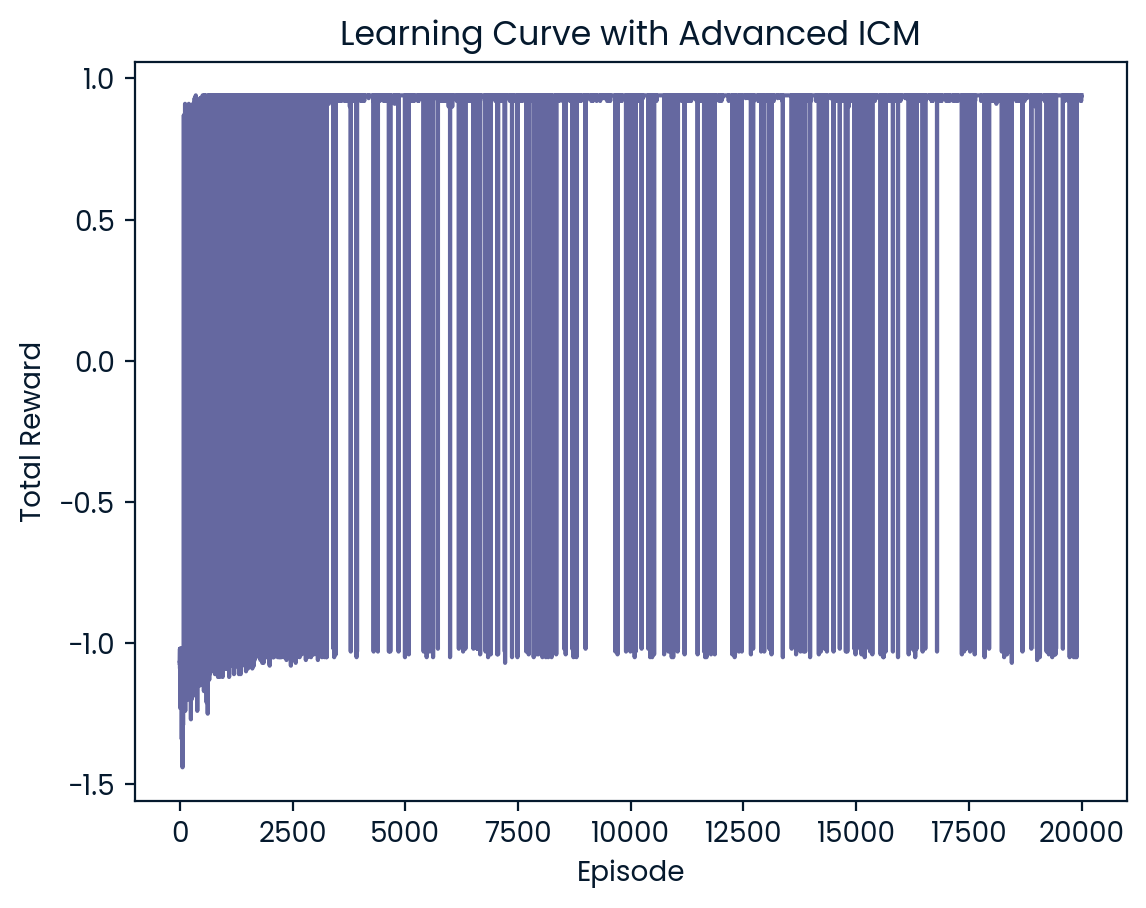

In [179]:
import numpy as np
import random
import torch
from collections import deque

# Initialize the environment
env = gym.make('FrozenLake-v1', is_slippery=False)

# Hyperparameters
max_episodes = 20000
max_actions = 100
learning_rate = 0.01
discount_factor = 0.99
epsilon = 1.0
epsilon_decay = 0.999
epsilon_min = 0.01
curiosity_beta = 0.2
batch_size = 64

# Initialize Q-table
state_size = env.observation_space.n
action_size = env.action_space.n
q_table = np.zeros((state_size, action_size))

# Initialize Advanced ICM
class AdvancedICM:
    def __init__(self, state_dim, action_dim):
        # Initialize your ICM model here
        pass

    def __call__(self, state, action, next_state):
        # Compute intrinsic reward here
        intrinsic_reward = 0.0  # Placeholder
        return None, None, intrinsic_reward

    def update(self, state, action, next_state):
        # Update your ICM model here
        pass

advanced_icm = AdvancedICM(state_dim=1, action_dim=action_size)

# Replay Buffer
class ReplayBuffer:
    def __init__(self, capacity):
        self.capacity = capacity
        self.buffer = deque(maxlen=capacity)

    def add(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)

# Initialize replay buffer
replay_buffer = ReplayBuffer(capacity=10000)

# Training loop
episode_rewards = []

# Modify the reward calculation in the training loop
# Modify the reward calculation in the training loop
# Modify the reward calculation in the training loop
hole_penalty = -1.0  # Penalty for falling into a hole
step_penalty = -0.01  # Small penalty for each step

for episode in range(max_episodes):
    state = env.reset()
    if isinstance(state, (tuple, np.ndarray)):  # Handle cases where state is not an integer
        state = state[0]  # Extract the integer state from the tuple or array

    total_reward = 0
    steps = 0

    for _ in range(max_actions):
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        # Execute the action
        next_state, reward, done, truncated, info = env.step(action)
        if isinstance(next_state, (tuple, np.ndarray)):  # Handle cases where next_state is not an integer
            next_state = next_state[0]  # Extract the integer state from the tuple or array

        # Add penalties
        if done and reward == 0.0:  # Fell into a hole
            reward += hole_penalty
        reward += step_penalty  # Penalty for each step

        # Accumulate the total reward
        total_reward += reward

        # Update Q-values
        old_q_value = q_table[state, action]
        max_next_q_value = np.max(q_table[next_state])
        new_q_value = old_q_value + learning_rate * (reward + discount_factor * max_next_q_value - old_q_value)
        q_table[state, action] = new_q_value

        state = next_state
        steps += 1

        if done or truncated:
            break

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Record the total reward for this episode
    episode_rewards.append(total_reward)

    # Print progress
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{max_episodes}, Total Reward: {total_reward}, Steps: {steps}, Epsilon: {epsilon:.3f}")
print("Training completed.")

# Plot the learning curve
import matplotlib.pyplot as plt
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Learning Curve with Advanced ICM')
plt.show()

Episode 100/10000, Total Reward: 1.2500000000000018, Steps: 6, Epsilon: 0.606
Episode 200/10000, Total Reward: 1.120000000000001, Steps: 3, Epsilon: 0.367
Episode 300/10000, Total Reward: 7.090000000000001, Steps: 6, Epsilon: 0.222
Episode 400/10000, Total Reward: 1.120000000000001, Steps: 4, Epsilon: 0.135
Episode 500/10000, Total Reward: 7.090000000000001, Steps: 6, Epsilon: 0.082
Episode 600/10000, Total Reward: 7.090000000000001, Steps: 6, Epsilon: 0.049
Episode 700/10000, Total Reward: 7.090000000000001, Steps: 6, Epsilon: 0.030
Episode 800/10000, Total Reward: 7.090000000000001, Steps: 6, Epsilon: 0.018
Episode 900/10000, Total Reward: 7.090000000000001, Steps: 6, Epsilon: 0.011
Episode 1000/10000, Total Reward: 7.090000000000001, Steps: 6, Epsilon: 0.010
Episode 1100/10000, Total Reward: 7.090000000000001, Steps: 6, Epsilon: 0.010
Episode 1200/10000, Total Reward: 7.090000000000001, Steps: 6, Epsilon: 0.010
Episode 1300/10000, Total Reward: 7.090000000000001, Steps: 6, Epsilon: 

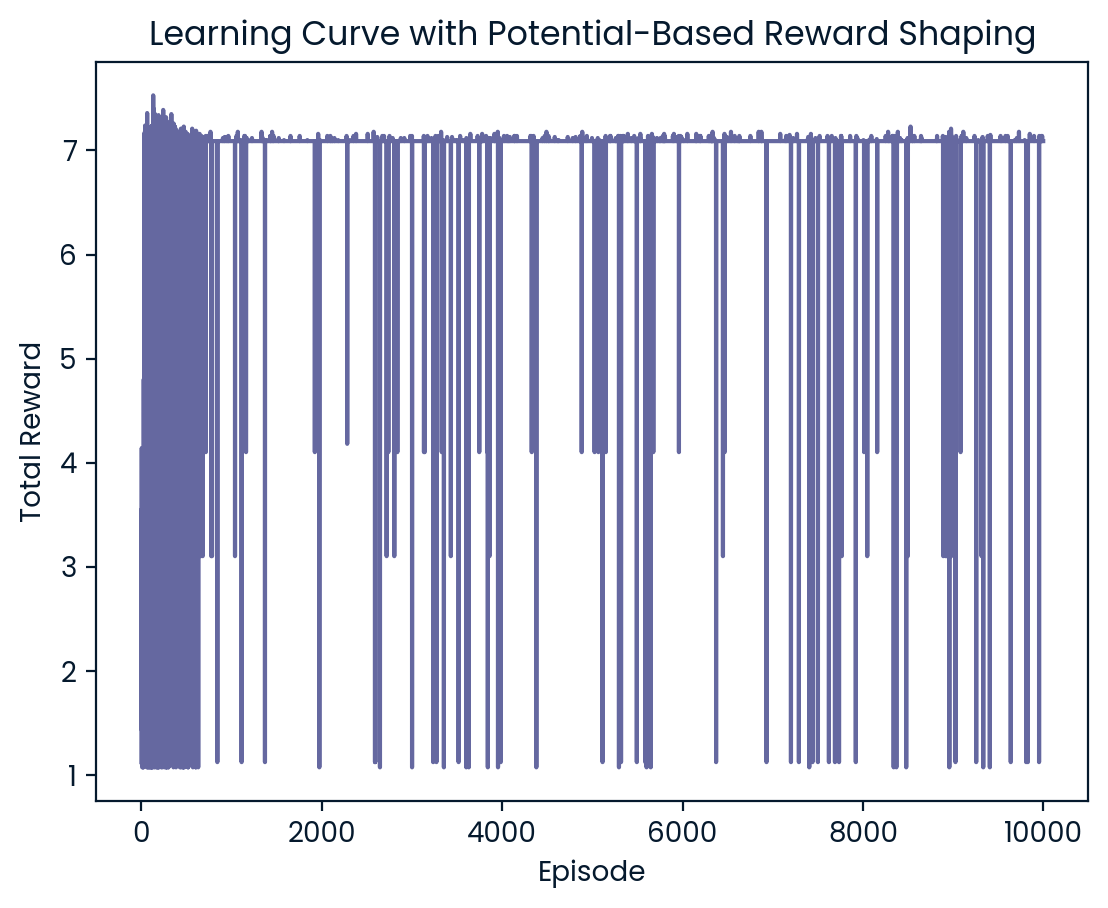

In [185]:
import numpy as np

# Initialize the environment
env = gym.make('FrozenLake-v1', is_slippery=False)

# Hyperparameters
max_episodes = 10000
max_actions = 100
learning_rate = 0.1
discount_factor = 0.99
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.01
hole_penalty = -1.0  # Penalty for falling into a hole
step_penalty = -0.01  # Small penalty for each step

# Initialize Q-table
state_size = env.observation_space.n
action_size = env.action_space.n
q_table = np.zeros((state_size, action_size))

# Define the potential function
def potential(state):
    goal_state = 15  # Goal is at state 15
    goal_row, goal_col = goal_state // 4, goal_state % 4
    row, col = state // 4, state % 4
    return - (abs(row - goal_row) + abs(col - goal_col))  # Negative Manhattan distance

# Training loop
episode_rewards = []

for episode in range(max_episodes):
    state = env.reset()
    if isinstance(state, (tuple, np.ndarray)):  # Handle cases where state is not an integer
        state = state[0]  # Extract the integer state from the tuple or array

    total_reward = 0
    steps = 0

    for _ in range(max_actions):
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        # Execute the action
        next_state, reward, done, truncated, info = env.step(action)
        if isinstance(next_state, (tuple, np.ndarray)):  # Handle cases where next_state is not an integer
            next_state = next_state[0]  # Extract the integer state from the tuple or array

        # Compute the shaped reward
        original_reward = reward
        if done and reward == 0.0:  # Fell into a hole
            original_reward += hole_penalty
        original_reward += step_penalty  # Penalty for each step

        # Potential-based reward shaping
        shaped_reward = original_reward + discount_factor * potential(next_state) - potential(state)

        # Accumulate the total reward
        total_reward += shaped_reward

        # Update Q-values
        old_q_value = q_table[state, action]
        max_next_q_value = np.max(q_table[next_state])
        new_q_value = old_q_value + learning_rate * (shaped_reward + discount_factor * max_next_q_value - old_q_value)
        q_table[state, action] = new_q_value

        state = next_state
        steps += 1

        if done or truncated:
            break

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Record the total reward for this episode
    episode_rewards.append(total_reward)

    # Print progress
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{max_episodes}, Total Reward: {total_reward}, Steps: {steps}, Epsilon: {epsilon:.3f}")

print("Training completed.")

# Plot the learning curve
import matplotlib.pyplot as plt
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Learning Curve with Potential-Based Reward Shaping')
plt.show()

# Tentation of fixing 

In [189]:
import torch
import torch.nn as nn
import torch.optim as optim

class AdvancedICM(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_dim=64):
        super(AdvancedICM, self).__init__()
        self.state_dim = state_dim
        self.action_dim = action_dim

        # Forward model: predicts next state given current state and action
        self.forward_model = nn.Sequential(
            nn.Linear(state_dim + action_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, state_dim)
        )

        # Inverse model: predicts action given current state and next state
        self.inverse_model = nn.Sequential(
            nn.Linear(state_dim * 2, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, action_dim),
            nn.Softmax(dim=-1)
        )

        # Optimizer
        self.optimizer = optim.Adam(self.parameters(), lr=0.001)

    def forward(self, state, action, next_state):
        # Forward model prediction
        state_action = torch.cat([state, action], dim=-1)
        predicted_next_state = self.forward_model(state_action)

        # Inverse model prediction
        state_next_state = torch.cat([state, next_state], dim=-1)
        predicted_action = self.inverse_model(state_next_state)

        return predicted_next_state, predicted_action

    def compute_intrinsic_reward(self, state, action, next_state):
        # Compute intrinsic reward as the prediction error of the forward model
        state_tensor = torch.FloatTensor(state)
        action_tensor = torch.FloatTensor(action)
        next_state_tensor = torch.FloatTensor(next_state)

        predicted_next_state, _ = self.forward(state_tensor, action_tensor, next_state_tensor)
        intrinsic_reward = torch.norm(predicted_next_state - next_state_tensor).item()
        return intrinsic_reward

    def update(self, state, action, next_state):
        # Convert inputs to tensors
        state_tensor = torch.FloatTensor(state)
        action_tensor = torch.FloatTensor(action)
        next_state_tensor = torch.FloatTensor(next_state)

        # Forward pass
        predicted_next_state, predicted_action = self.forward(state_tensor, action_tensor, next_state_tensor)

        # Compute losses
        forward_loss = nn.MSELoss()(predicted_next_state, next_state_tensor)
        inverse_loss = nn.CrossEntropyLoss()(predicted_action, action_tensor.argmax(dim=-1))
        loss = forward_loss + inverse_loss

        # Backward pass and optimization
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        return loss.item()

In [190]:
from collections import deque
import random

class ReplayBuffer:
    def __init__(self, capacity):
        self.capacity = capacity
        self.buffer = deque(maxlen=capacity)

    def add(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)
    


In [198]:
!pip install gym

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 48.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827619 sha256=ec65b961505a2570de7ddc1118921b8ebf16ba407c1f6cb8207e00beda4ba240
  Stored in directory: /home/repl/.cache/pip/wheels/17/79/65/7afedc162d858b02708a3b8f7a6dd5b1000dcd5b0f894f7cc1
Successfully built gym


In [210]:
import numpy as np

class AdvancedAdaptiveEpsilon:
    def __init__(
        self,
        initial_epsilon=1.0,
        min_epsilon=0.01,
        base_decay_rate=0.995,
        reward_improvement_threshold=0.1,
        novelty_decay_factor=0.99,
        uncertainty_decay_factor=0.98,
        rolling_window_size=10,
    ):
        """
        Advanced adaptive epsilon decay that adjusts based on:
        - Reward improvement trends
        - State novelty (e.g., visitation counts)
        - Uncertainty estimates (e.g., model uncertainty)
        """
        self.initial_epsilon = initial_epsilon
        self.epsilon = initial_epsilon
        self.min_epsilon = min_epsilon
        self.base_decay_rate = base_decay_rate
        self.reward_improvement_threshold = reward_improvement_threshold
        self.novelty_decay_factor = novelty_decay_factor
        self.uncertainty_decay_factor = uncertainty_decay_factor
        self.rolling_window_size = rolling_window_size

        # Track reward history for trend analysis
        self.reward_history = []

        # Track state novelty (e.g., visitation counts)
        self.state_visitation_counts = {}

        # Track uncertainty (e.g., model uncertainty or prediction error)
        self.uncertainty_history = []

    def decay_epsilon(self, current_reward, current_state, current_uncertainty):
        """
        Update epsilon based on:
        - Reward trends
        - State novelty
        - Uncertainty estimates
        """
        # Update reward history and compute trend
        self.reward_history.append(current_reward)
        if len(self.reward_history) > self.rolling_window_size:
            self.reward_history.pop(0)

        # Compute reward improvement trend
        reward_improvement = self._compute_reward_improvement()

        # Update state novelty (visitation counts)
        self._update_state_novelty(current_state)

        # Update uncertainty history
        self.uncertainty_history.append(current_uncertainty)
        if len(self.uncertainty_history) > self.rolling_window_size:
            self.uncertainty_history.pop(0)

        # Compute adaptive decay rate
        decay_rate = self.base_decay_rate

        # Adjust decay rate based on reward improvement
        if reward_improvement < self.reward_improvement_threshold:
            decay_rate *= 1.01  # Slow down decay if improvement is insufficient

        # Adjust decay rate based on state novelty
        if self._is_state_novel(current_state):
            decay_rate *= self.novelty_decay_factor  # Encourage exploration for novel states

        # Adjust decay rate based on uncertainty
        if np.mean(self.uncertainty_history) > 0.5:  # Example threshold for high uncertainty
            decay_rate *= self.uncertainty_decay_factor  # Encourage exploration in uncertain states

        # Decay epsilon
        self.epsilon = max(self.min_epsilon, self.epsilon * decay_rate)

    def _compute_reward_improvement(self):
        """Compute the average reward improvement over the rolling window."""
        if len(self.reward_history) < 2:
            return 0
        improvements = [
            self.reward_history[i] - self.reward_history[i - 1]
            for i in range(1, len(self.reward_history))
        ]
        return np.mean(improvements)

    def _update_state_novelty(self, state):
        """Update state visitation counts."""
        if state not in self.state_visitation_counts:
            self.state_visitation_counts[state] = 0
        self.state_visitation_counts[state] += 1

    def _is_state_novel(self, state):
        """Check if a state is novel based on visitation counts."""
        return self.state_visitation_counts.get(state, 0) < 5  # Example threshold for novelty

    def get_epsilon(self):
        """Return the current epsilon value."""
        return self.epsilon

In [211]:
import random
from collections import deque
import numpy as np

class ExperienceReplayBuffer:
    def __init__(self, buffer_size):
        """
        Initialize the experience replay buffer.
        :param buffer_size: Maximum number of transitions to store.
        """
        self.buffer_size = buffer_size
        self.buffer = deque(maxlen=buffer_size)

    def add(self, state, action, reward, next_state, done):
        """
        Add a transition (state, action, reward, next_state, done) to the buffer.
        """
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        """
        Sample a batch of transitions from the buffer.
        :param batch_size: Number of transitions to sample.
        :return: A list of sampled transitions.
        """
        if len(self.buffer) < batch_size:
            raise ValueError("Not enough transitions in the buffer to sample.")
        return random.sample(self.buffer, batch_size)

    def __len__(self):
        """
        Return the current number of transitions in the buffer.
        """
        return len(self.buffer)

In [213]:
class QLearningWithReplay:
    def __init__(self, state_space, action_space, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, min_epsilon=0.01, buffer_size=10000, batch_size=32):
        """
        Initialize Q-learning with experience replay.
        :param state_space: Size of the state space.
        :param action_space: Size of the action space.
        :param alpha: Learning rate.
        :param gamma: Discount factor.
        :param epsilon: Initial exploration rate.
        :param epsilon_decay: Decay rate for epsilon.
        :param min_epsilon: Minimum value for epsilon.
        :param buffer_size: Size of the experience replay buffer.
        :param batch_size: Number of transitions to sample for each update.
        """
        self.state_space = state_space
        self.action_space = action_space
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.batch_size = batch_size

        # Initialize Q-table
        self.q_table = np.zeros((state_space, action_space))

        # Initialize experience replay buffer
        self.buffer = ExperienceReplayBuffer(buffer_size)

    def choose_action(self, state):
        """
        Choose an action using an epsilon-greedy policy.
        """
        if random.uniform(0, 1) < self.epsilon:
            return random.randint(0, self.action_space - 1)  # Explore
        else:
            return np.argmax(self.q_table[state])  # Exploit

    def learn(self):
        """
        Sample a batch of transitions from the buffer and update the Q-table.
        """
        if len(self.buffer) < self.batch_size:
            return  # Not enough samples to learn

        # Sample a batch of transitions
        batch = self.buffer.sample(self.batch_size)

        for state, action, reward, next_state, done in batch:
            # Q-learning update rule
            if done:
                target = reward
            else:
                target = reward + self.gamma * np.max(self.q_table[next_state])

            # Update Q-value
            self.q_table[state, action] += self.alpha * (target - self.q_table[state, action])

        # Decay epsilon
        self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

    def add_experience(self, state, action, reward, next_state, done):
        """
        Add a transition to the experience replay buffer.
        """
        self.buffer.add(state, action, reward, next_state, done)

Episode 100/10000, Total Reward: 4.1000000000000005, Steps: 8, Epsilon: 0.177
Episode 200/10000, Total Reward: 5.090000000000001, Steps: 6, Epsilon: 0.051
Episode 300/10000, Total Reward: 5.090000000000001, Steps: 6, Epsilon: 0.013
Episode 400/10000, Total Reward: 5.090000000000001, Steps: 6, Epsilon: 0.010
Episode 500/10000, Total Reward: 4.090000000000001, Steps: 6, Epsilon: 0.010
Episode 600/10000, Total Reward: 5.090000000000001, Steps: 6, Epsilon: 0.010
Episode 700/10000, Total Reward: 7.090000000000001, Steps: 6, Epsilon: 0.010
Episode 800/10000, Total Reward: 4.090000000000001, Steps: 6, Epsilon: 0.010
Episode 900/10000, Total Reward: 6.090000000000001, Steps: 6, Epsilon: 0.011
Episode 1000/10000, Total Reward: 6.090000000000001, Steps: 6, Epsilon: 0.010
Episode 1100/10000, Total Reward: 4.090000000000001, Steps: 6, Epsilon: 0.010
Episode 1200/10000, Total Reward: 6.090000000000001, Steps: 6, Epsilon: 0.010
Episode 1300/10000, Total Reward: 6.090000000000001, Steps: 6, Epsilon: 

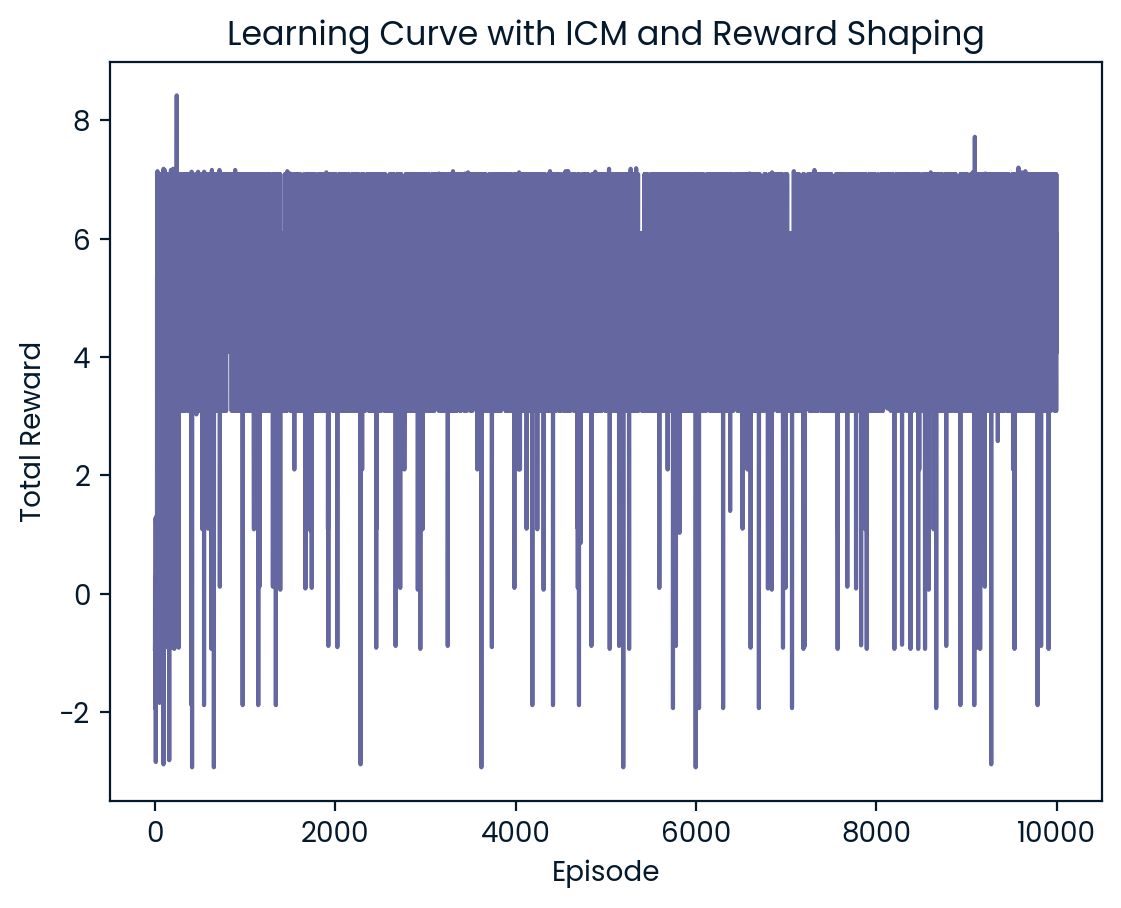

In [214]:
# Initialize the environment
env = gym.make('FrozenLake-v1', is_slippery=False)

# Hyperparameters
max_episodes = 10000
max_actions = 100
learning_rate = 0.1
discount_factor = 0.99
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.01
hole_penalty = -1.0  # Penalty for falling into a hole
step_penalty = -0.01  # Small penalty for each step
curiosity_beta = 0.2  # Weight for intrinsic reward

# Initialize Q-table
state_size = env.observation_space.n
action_size = env.action_space.n
q_table = np.zeros((state_size, action_size))

# Initialize Advanced ICM
advanced_icm = AdvancedICM(state_dim=1, action_dim=action_size)

# Initialize replay buffer
replay_buffer = ReplayBuffer(capacity=10000)

# Define the potential function
def potential(state):
    goal_state = 15  # Goal is at state 15
    goal_row, goal_col = goal_state // 4, goal_state % 4
    row, col = state // 4, state % 4
    return - (abs(row - goal_row) + abs(col - goal_col))  # Negative Manhattan distance

adaptive_epsilon = AdvancedAdaptiveEpsilon(
    initial_epsilon=1.0,
    min_epsilon=0.01,
    base_decay_rate=0.995,
    reward_improvement_threshold=0.1,
    novelty_decay_factor=0.99,
    uncertainty_decay_factor=0.98,
    rolling_window_size=10,
)
state_space = 10  # Example: 10 possible states
action_space = 4  # Example: 4 possible actions
agent = QLearningWithReplay(state_space, action_space)

# Training loop
episode_rewards = []

for episode in range(max_episodes):
    state = env.reset()
    if isinstance(state, (tuple, np.ndarray)):  # Handle cases where state is not an integer
        state = state[0]  # Extract the integer state from the tuple or array
    current_reward = np.random.rand()  # Replace with actual reward
    current_state = tuple(np.random.randint(0, 10, size=2))  # Replace with actual state
    current_uncertainty = np.random.rand()
    total_reward = 0
    steps = 0
    state = random.randint(0, state_space - 1)  # Start in a random state
    done = False

    while not done:
        # Choose an action
        action = agent.choose_action(state)

        # Simulate the environment (replace with actual environment interaction)
        next_state = random.randint(0, state_space - 1)
        reward = random.uniform(-1, 1)
        done = random.random() < 0.1  # 10% chance to end the episode

        # Add the transition to the buffer
        agent.add_experience(state, action, reward, next_state, done)

        # Learn from the buffer
        agent.learn()

        # Move to the next state
        state = next_state
    for _ in range(max_actions):
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        # Execute the action
        next_state, reward, done, truncated, info = env.step(action)
        if isinstance(next_state, (tuple, np.ndarray)):  # Handle cases where next_state is not an integer
            next_state = next_state[0]  # Extract the integer state from the tuple or array

        # Compute the shaped reward
        original_reward = reward
        if done and reward == 0.0:  # Fell into a hole
            original_reward += hole_penalty
        original_reward += step_penalty  # Penalty for each step

        # Potential-based reward shaping
        shaped_reward = original_reward + discount_factor * potential(next_state) - potential(state)

        # Compute intrinsic reward using ICM
        intrinsic_reward = advanced_icm.compute_intrinsic_reward(state, action, next_state)

        # Total reward = shaped reward + intrinsic reward
        total_reward += shaped_reward + curiosity_beta * intrinsic_reward

        # Store the transition in the replay buffer
        replay_buffer.add(state, action, shaped_reward, next_state, done)

        # Update ICM
        advanced_icm.update(state, action, next_state)

        # Update Q-values
        old_q_value = q_table[state, action]
        max_next_q_value = np.max(q_table[next_state])
        new_q_value = old_q_value + learning_rate * (shaped_reward + curiosity_beta * intrinsic_reward + discount_factor * max_next_q_value - old_q_value)
        q_table[state, action] = new_q_value

        state = next_state
        steps += 1

        if done or truncated:
            break
    adaptive_epsilon.decay_epsilon(current_reward, current_state, current_uncertainty)

    # Decay epsilon
    epsilon = adaptive_epsilon.get_epsilon()

    # Record the total reward for this episode
    episode_rewards.append(total_reward)

    # Print progress
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}/{max_episodes}, Total Reward: {total_reward}, Steps: {steps}, Epsilon: {epsilon:.3f}")

print("Training completed.")

# Plot the learning curve
import matplotlib.pyplot as plt
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Learning Curve with ICM and Reward Shaping')
plt.show()

In [215]:
import numpy as np
#import gym

# Initialize the environment
env = gym.make('FrozenLake-v1', is_slippery=False)

# Define the grid layout manually
grid_layout = [
    "SFFF",  # S: Start, F: Frozen, H: Hole, G: Goal
    "FHFH",
    "FFFH",
    "HFFG"
    
]

# Function to print the environment state
def print_environment(state):
    grid = [list(line) for line in grid_layout]  # Convert the grid layout to a list of lists
    row = state // 4  # Calculate the row of the agent's position
    col = state % 4   # Calculate the column of the agent's position
    grid[row][col] = 'A'  # Mark the agent's position
    for line in grid:
        print(''.join(line))  # Print the grid line by line

# Set the seed for reproducibility
#np.random.seed(42)
#env.seed(42)

# Initialize variables for testing
state = env.reset()
if isinstance(state, (tuple, np.ndarray)):  # Handle cases where state is not an integer
    state = state[0]  # Extract the integer state from the tuple or array

episode_total_reward = 0
action_count = 0

# Print the initial state
print("Initial State:")
print_environment(state)

while action_count < 16:  # Limit to 16 actions
    # Use the learned policy to select an action
    action = np.argmax(q_table[state])

    # Execute the action
    next_state, reward, done, truncated, info = env.step(action)
    if isinstance(next_state, (tuple, np.ndarray)):  # Handle cases where next_state is not an integer
        next_state = next_state[0]  # Extract the integer state from the tuple or array

    # Accumulate the total reward
    episode_total_reward += reward

    # Move to the next state
    state = next_state

    # Increment the action counter
    action_count += 1

    # Print the current state
    print(f"\nAction {action_count}:")
    print_environment(state)

    # Check if the episode is done
    if done or truncated:
        break

print(f"\nEpisode total reward: {episode_total_reward}")
env.close()

Initial State:
AFFF
FHFH
FFFH
HFFG

Action 1:
SAFF
FHFH
FFFH
HFFG

Action 2:
SFAF
FHFH
FFFH
HFFG

Action 3:
SFFF
FHAH
FFFH
HFFG

Action 4:
SFFF
FHFH
FFAH
HFFG

Action 5:
SFFF
FHFH
FFFH
HFAG

Action 6:
SFFF
FHFH
FFFH
HFFA

Episode total reward: 1.0


In [216]:
# Set the seed for reproducibility
""""np.random.seed(42)
env.seed(42)"""

# Initialize variables for testing
state = env.reset()
if isinstance(state, (tuple, np.ndarray)):  # Handle cases where state is not an integer
    state = state[0]  # Extract the integer state from the tuple or array

episode_total_reward = 0
action_count = 0

while action_count < 16:  # Limit to 16 actions
    # Use the learned policy to select an action
    action = np.argmax(q_table[state])

    # Execute the action
    next_state, reward, done, truncated, info = env.step(action)
    if isinstance(next_state, (tuple, np.ndarray)):  # Handle cases where next_state is not an integer
        next_state = next_state[0]  # Extract the integer state from the tuple or array

    # Accumulate the total reward
    episode_total_reward += reward

    # Move to the next state
    state = next_state

    # Increment the action counter
    action_count += 1

    # Check if the episode is done
    if done or truncated:
        break

print(f"Episode total reward: {episode_total_reward}")
env.close()

Episode total reward: 1.0


In [217]:
def visualize_policy(q_table):
    policy = np.argmax(q_table, axis=1)
    actions = ['←', '↓', '→', '↑']
    grid = [
        "SFFF",
        "FHFH",
        "FFFH",
        "HFFG"
    ]
    for i in range(4):
        for j in range(4):
            state = i * 4 + j
            if grid[i][j] in ['S', 'F']:
                print(actions[policy[state]], end=' ')
            else:
                print(grid[i][j], end=' ')
        print()

# Visualize the learned policy
visualize_policy(q_table)

→ → ↓ → 
↓ H ↓ H 
→ ↓ ↓ H 
H → → G 


In [119]:
# Once you are done, run this cell to visualize the agent's behavior through the episode
# Save frames as a GIF
import imageio
from IPython.display import Image, display

# Ensure 'frames' is not None and contains valid image data
if 'frames' in globals() and frames and all(frame is not None for frame in frames):
    imageio.mimsave('taxi_agent_behavior.gif', frames, fps=5)
    
    # Display GIF
    gif_path = "taxi_agent_behavior.gif" 
    display(Image(gif_path))
else:
    print("Frames list is empty or contains None values. Please ensure 'frames' is populated with valid image data.")

Frames list is empty or contains None values. Please ensure 'frames' is populated with valid image data.
